<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/Nairobi-Hospital-Hypothyroid/blob/main/WEEK_8_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. DEFINING THE QUESTION

##a) Specifying  the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. As a data scientisit I have provided with healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##b) Defining metric for success

Successful identification of a model( decision trees or SVM) with the best score and accuracy and providing that as the best model to the Nairobi hospitla to predict patients with hypothyroid.

##c) Understanding the context
The Nairobi Hospital is a private hospital located in upperhill area, Nairobi, Kenya.The hospital was founded in 1954 as a European hospital. Nairobi carried out a medical campspecifically to detect hypothyroidism((underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.)

Blood Tests: Hypothyroidism can be detected by different blood tests.

- TSH Test.  A thyroid-stimulating hormone or TSH is a blood test that measures the amount of T4 (thyroxine) that the thyroid is being signaled to make. If you have an abnormally high level of TSH, it could mean you have hypothyroidism.
- T4 (thyroxine) Test. The thyroid gland produces T4 (thyroxine). The free T4 and the free T4 index are blood tests that, in combination with a TSH test, can let your physician know how your thyroid is functioning. 

Risk factors include:
- Are a woman
- Are older than 60
- Have a family history of thyroid disease
- Have an autoimmune disease, such as type 1 diabetes or celiac disease
- Have been treated with radioactive iodine or anti-thyroid medications
- Received radiation to your neck or upper chest
- Have had thyroid surgery (partial thyroidectomy)
- Have been pregnant or delivered a baby within the past six months

Medication
T- here are two antithyroid medications available—propylthiouracil (PTU) and methimazole (also known as Tapazole).The medications are similar, as they both stop the thyroid from producing T3 and T4 hormones.
- Levothyroxine(thyroxine medication) is used to treat an underactive thyroid (hypothyroidism). It replaces or provides more thyroid hormone, which is normally produced by the thyroid gland

##d) Recording experimental designs
The follwing is the order in which the project was carried out:
- Data sourcing
- External data validation
- Data claenaing and tidying up
- EDA
- Implementing the solution
  - Building the models
- Challenging the solutions and follow up questions

##e) Data relevance

The data provided can be found in this [link](http://bit.ly/hypothyroid_data). It contains all the features and the relevant ones will be selected once the metrics for success have been calculated and obtained.

#2. READING AND CHECKING THE DATA

In [1]:
#Importing the libraries  we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
#Rnadom forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Gradient boost
from sklearn.ensemble import GradientBoostingClassifier

# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Loading our data
data = pd.read_csv('/content/hypothyroid.csv')

#Previewing the head
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#Previewing the tail
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


Dataset shape

In [4]:
print(data.shape)
print(data.size)

(3163, 26)
82238


Data set summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
data.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


Checking the column names for uniformity

In [7]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Checking for duplicates

In [8]:
print('Total number of duplicates ' +str(data.duplicated().sum()))

Total number of duplicates 77


The dataset has 3163 entries with 26 columns and a size of 80236. All 26 columns that are of object format. The column names are not standardadized with  and have no trailing white spaces and middle white spaces and are all lower cased. There are only two outcome - having hyothyroid or negative. Sex has 3 unique values. Therefore the columns names will have to be standardized and the sex columns cleaned.
The datatype will need to be changed to the correct format as well. Some of the rows have ? most likely indicating missing or unfilled data.

The columns with false and true will be changed to boolean, the columns with categorical values will be encoded and the numerical columns changed to integer or float accordingly.

#3. EXTERNAL DATA SOURCE VALIDATION

#4. TIDYING UP THE DATASET

###Duplicates

In [9]:
#Dropping the duplicates
data = data.drop_duplicates()

#Confirming if duplicates have been dropped
print('Total number of duplicates ' +str(data.duplicated().sum()))

Total number of duplicates 0


###Column names standardazing

In [10]:
# Changing all column names to lower case
data.columns = data.columns.str.lower()
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

###Changing the column data types

In [11]:
data = data.replace(['?'],np.nan)
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN


In [12]:
#Numerical columns
numerical = ['age','tsh','t3', 'tt4','t4u', 'fti']
categorical = ['status','sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','tsh_measured', 't3_measured',  'tt4_measured', 
       't4u_measured', 't4u', 'fti_measured', 'tbg_measured', 'tbg']

# Using a for loop to change columns to their appriopriate datatypes and encoding the categorical columns
#
for column in data.columns:
  if column in numerical:
    data[column] = data[column].astype('float')
  elif column in categorical:
    data[column] = data[column].astype('category').cat.codes

#Checking the data types
data.dtypes

status                          int8
age                          float64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
thyroid_surgery                 int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
tsh_measured                    int8
tsh                          float64
t3_measured                     int8
t3                           float64
tt4_measured                    int8
tt4                          float64
t4u_measured                    int8
t4u                          float64
fti_measured                    int8
fti                          float64
tbg_measured                    int8
tbg                             int8
dtype: object

###Dealing with null values

In [13]:
#Identifying any null values in descending order
(data.isnull().sum()).sort_values(ascending= False)

t3                           680
tsh                          455
age                          438
tt4                          240
t4u                          239
fti                          238
tbg                            0
pregnant                       0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
sick                           0
tumor                          0
tbg_measured                   0
goitre                         0
tsh_measured                   0
t3_measured                    0
tt4_measured                   0
t4u_measured                   0
fti_measured                   0
status                         0
dtype: int64

- The TGB column has a most number of missing values and will therefore be dropped alomg with the tbg_measured column. 
- Sex column will be filled with the mode as it categorical.
- The rest of he columns with null values will be filled with the mean as they are numerical.

In [14]:
# Dropping tbg and tbg_measured columns
#data.drop(['tbg', 'tbg_measured'], axis = 1, inplace = True)

# Filling missing values in the sex column with mode
data.sex.fillna(data.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
for column in numerical:
  data[column].fillna(data[column].mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

In [15]:
data.sex.value_counts()

 0    2119
 1     894
-1      73
Name: sex, dtype: int64

In [16]:
data[['sex']] = data[['sex']].replace(-1, 0)
data.sex.value_counts()

0    2192
1     894
Name: sex, dtype: int64

In [17]:
#Previweing the cleaned dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,-1
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,-1
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,-1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,-1
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,-1


###Outliers and anomalies

In [18]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

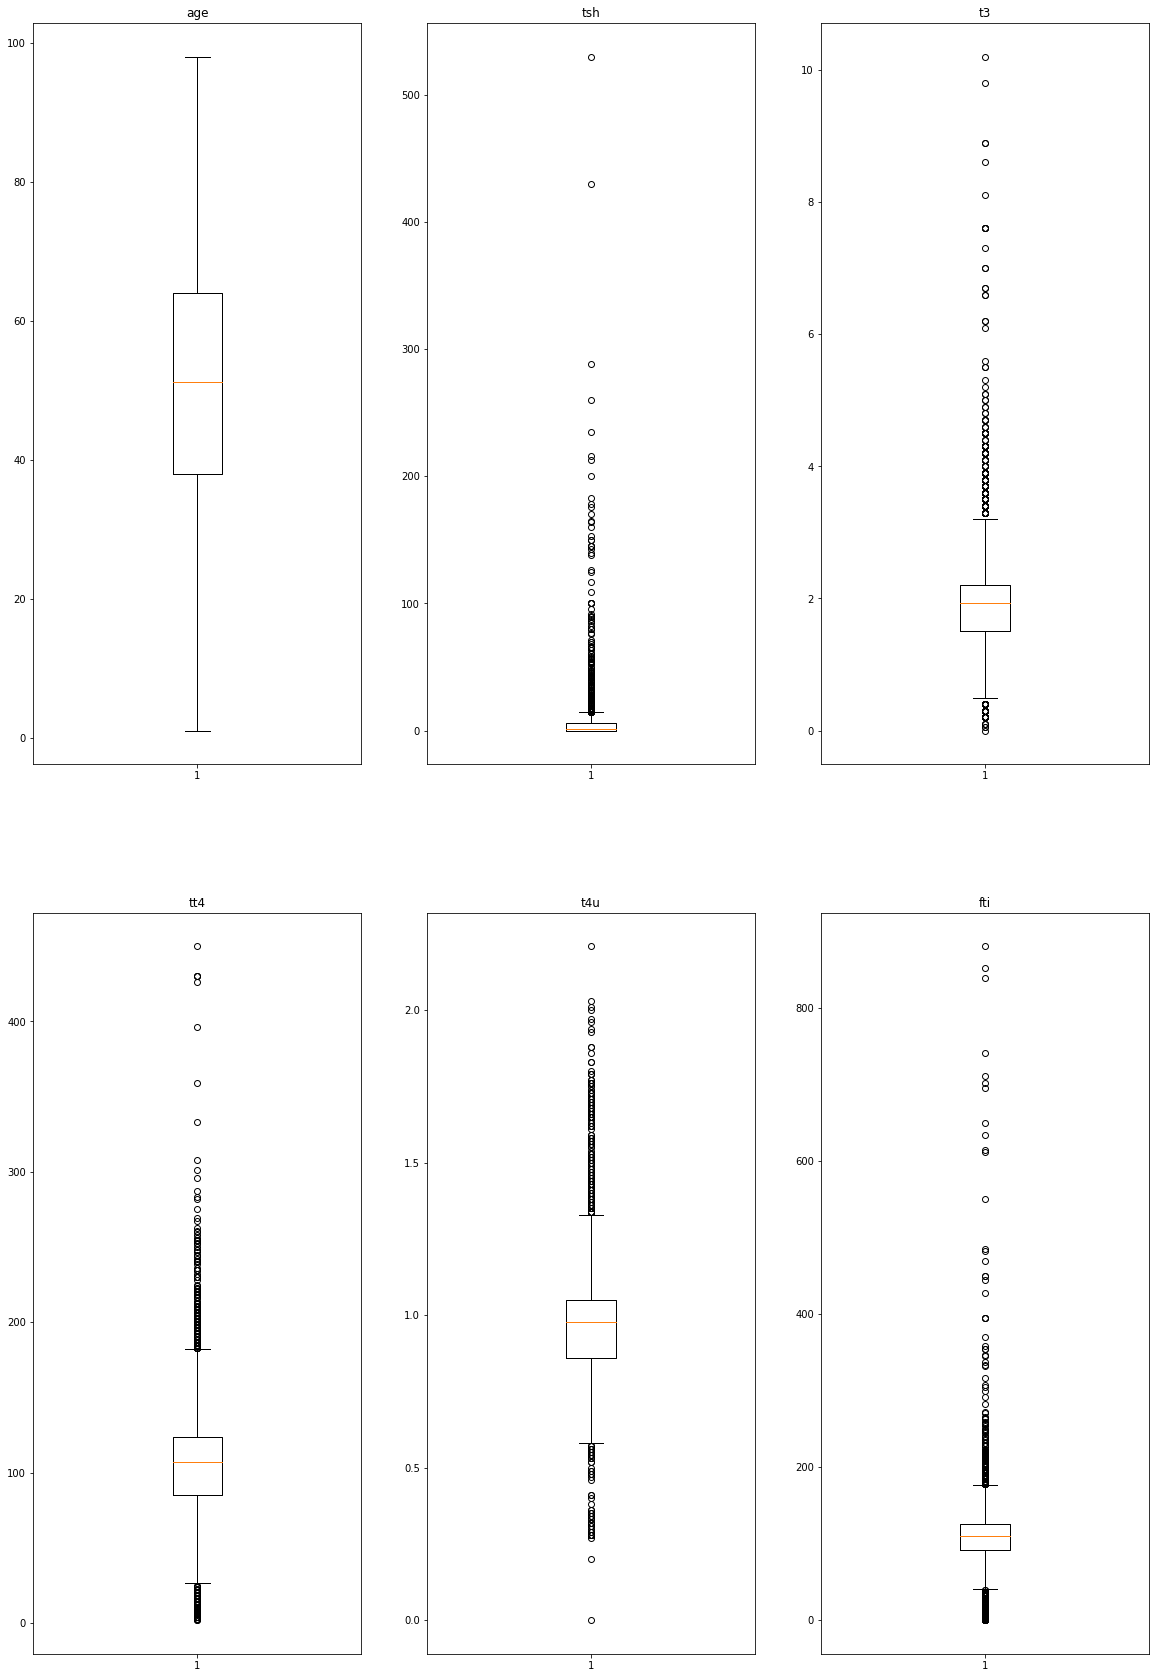

In [19]:
# Checking for Outliers
# save the column names onto a dictionary
columns_dict={ 'age':1,'tsh':2,'t3':3, 'tt4':4,'t4u':5, 'fti':6}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(2,3,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

#There are a number of outliers therefore we will need to remove th, as they would affect the coefficient of determination/R-squared and the y-intercept.

In [20]:
# # find quartile ranges for the column sum of bluecars_taken
# q1_life_e = house['price'].quantile(.25)
# q3_life_e = house['price'].quantile(.75)

# # calculating inter-quartile range using values from above
# iqr_life_e = q3_life_e - q1_life_e

# # another way is to find quantiles using the percentiles from the numpy library
# q1_l_e, q3_l_e = np.percentile(house['price'], [25, 75]) 
# # IQR
# iqr_l_e = q3_l_e - q1_l_e

# # compare if the two values are similar
# print(iqr_life_e, iqr_l_e)

#5. EXPLORATORY DATA ANALYSIS

In [21]:
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,-1
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,-1
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,-1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,-1
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,-1


## Univariate Analysis

In [22]:
# Creating our frequency table
data.status.value_counts()
#1 indicates the patients who are negtave and 0 represents patients with hypothyroid.

1    2945
0     141
Name: status, dtype: int64

1 indicates the patients who are negtave and 0 represents patients with hypothyroid. Therefore very few people were diagnosed with hypothyroid.

## Bivariate analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


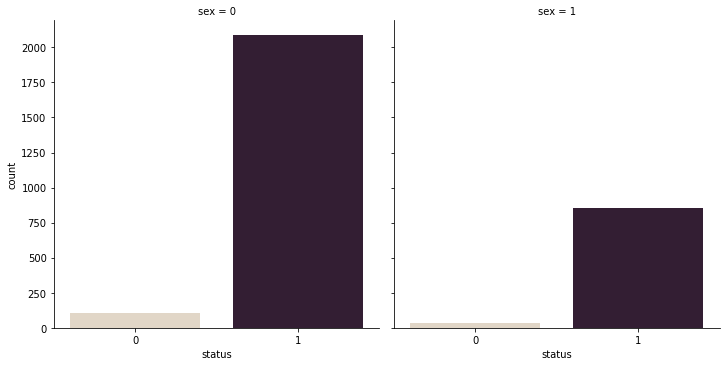

In [23]:
sns.catplot("status", col='sex',kind="count", palette="ch:.25", data=data)
plt.show()


Sex 0 represents female, therefore from the graph female patients were tested more and are more affected with hypothyroid(status 0) than male counterparts

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


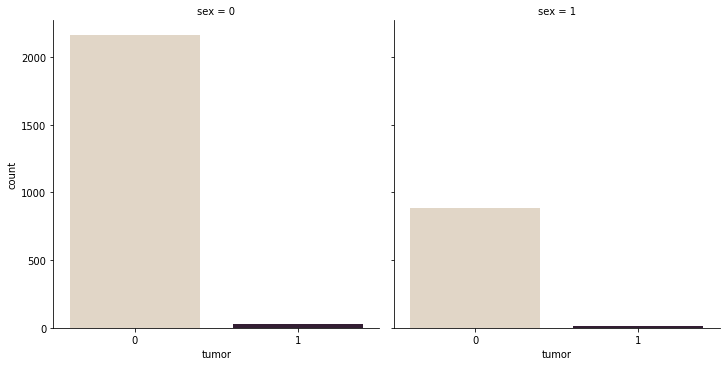

In [24]:
sns.catplot("tumor", col='sex',kind="count", palette="ch:.25", data=data)
plt.show()

From the graph above more women have tumors compared to the male patients.

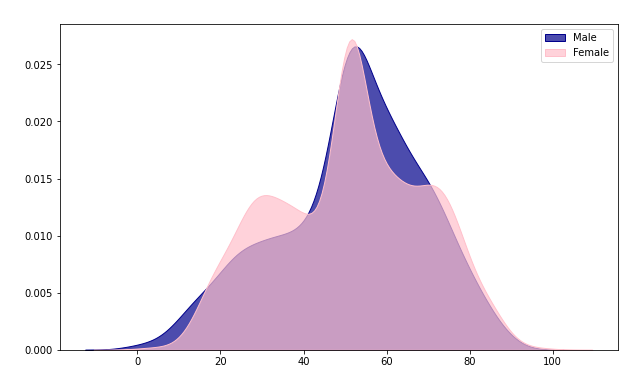

In [25]:

plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['sex'] == 1, "age"], shade=True, color="darkblue", label="Male", alpha=.7)
sns.kdeplot(data.loc[data['sex'] == 0, "age"], shade=True, color="pink", label="Female", alpha=.7)
plt.xlabel('Age', fontsize = 13, color= 'white')
plt.ylabel('Frequency', fontsize = 13, color = 'white')
plt.title('Frequency distribution of male and female', fontsize= 14, color= 'white')
plt.legend()
plt.show()

The age distribution between men and women is minimal with the  peak range of both sexes being between 40-60 years.

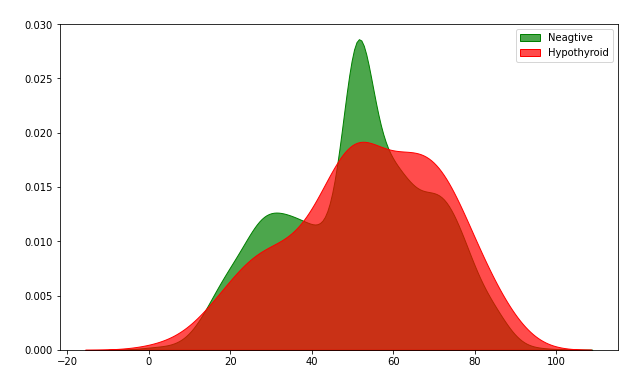

In [26]:
plt.figure(figsize=(10,6))
#sns.kdeplot(data=data, x="age", hue="status", multiple='stack')
sns.kdeplot(data.loc[data['status'] == 1, "age"], shade=True, color="green", label="Neagtive", alpha=.7)
sns.kdeplot(data.loc[data['status'] == 0, "age"], shade=True, color="red", label="Hypothyroid", alpha=.7)
plt.xlabel('Age', fontsize = 13, color= 'white')
plt.ylabel('Frequency of status', fontsize = 13, color = 'white')
plt.title('Frequency distribution of status in the difernt ages', fontsize= 14, color= 'white')
plt.legend()
plt.show()

From the graph above, most of the people who have hypothyroid are in the age range 40-60 years.

In [27]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

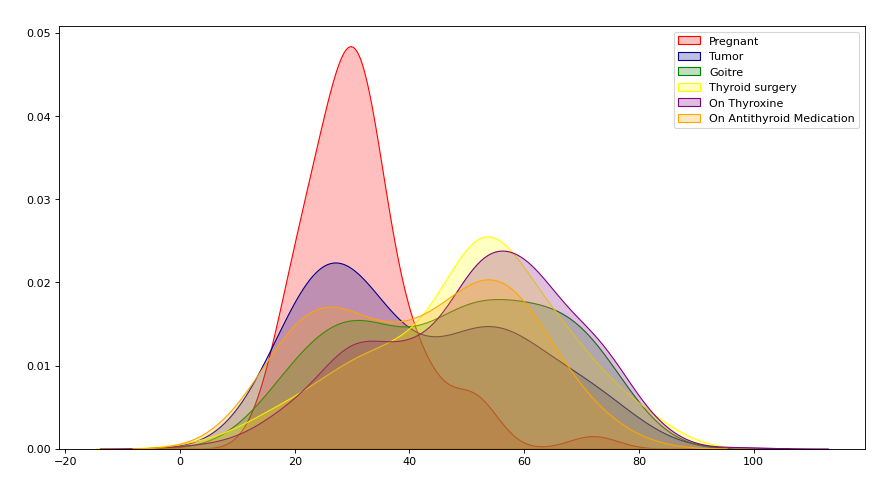

In [28]:
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(data.loc[data['pregnant'] == True, "age"], shade=True, color="red", label="Pregnant")
sns.kdeplot(data.loc[data['tumor'] == True, "age"], shade=True, color="darkblue", label="Tumor")
sns.kdeplot(data.loc[data['goitre'] == True, "age"], shade=True, color="green", label="Goitre")
sns.kdeplot(data.loc[data['thyroid_surgery'] == True, "age"], shade=True, color="yellow", label="Thyroid surgery")
sns.kdeplot(data.loc[data['on_thyroxine'] == True, "age"], shade=True, color="purple", label="On Thyroxine")
sns.kdeplot(data.loc[data['on_antithyroid_medication'] == True, "age"], shade=True, color="orange", label="On Antithyroid Medication")
plt.title('Density plot of age by Pregnancy,Surgery, Medication, Tumor and Goitre', fontsize=14, color = 'white')
plt.xlabel('Age', fontsize = 13, color = 'white')
plt.ylabel('Frequency', color = 'white', fontsize = 13)
plt.legend()
plt.show()

From the graph we can see that most people are pregrant and have a tumor between the ages of 20-4 years.
Most individual who underwent surgery, are on thyroxine and on antithyroid medication were in the age range of 40-70 years.

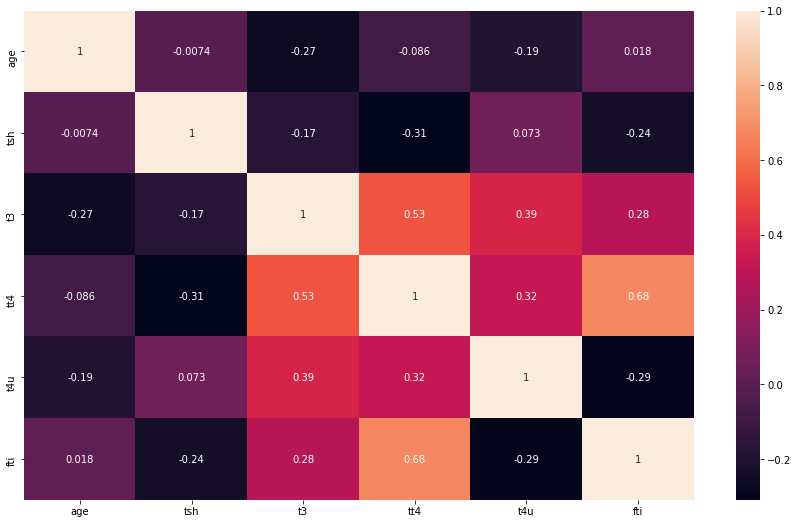

In [29]:
#Plotting a heatmap
numerical = data[numerical]
plt.figure(figsize=(15,9))
sns.heatmap(numerical.corr(), annot= True)

There is s trong positive correlation between tt4 and t3(0.53) and tt4 and fti(0.68).

<Figure size 480x320 with 0 Axes>

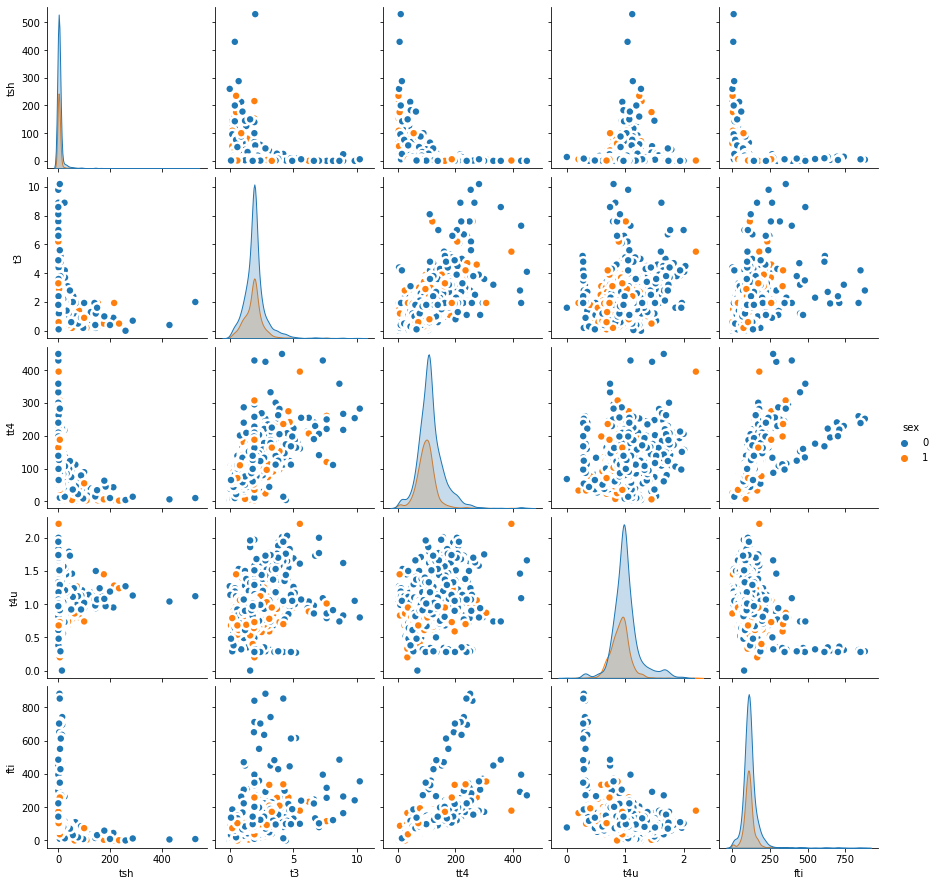

In [30]:
plt.figure(dpi= 80)
sns.pairplot(data[['tsh', 't3', 'tt4', 't4u', 'fti', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## Multivariate Analysis

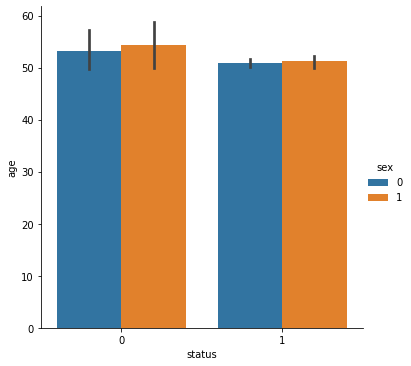

In [31]:
sns.catplot(x="status", y="age", hue="sex", kind="bar", data=data)

From the graph, there is very little difference in terms of age between the men and women who have hypothyroid or are negative.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


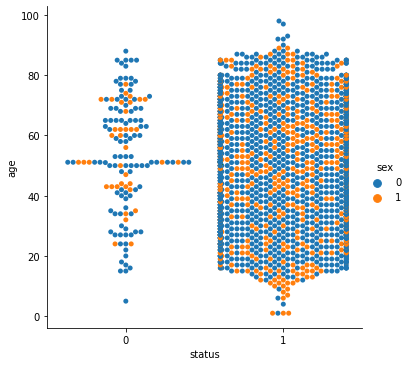

In [32]:
sns.catplot(x="status", y="age", hue="sex", kind="swarm", data=data)

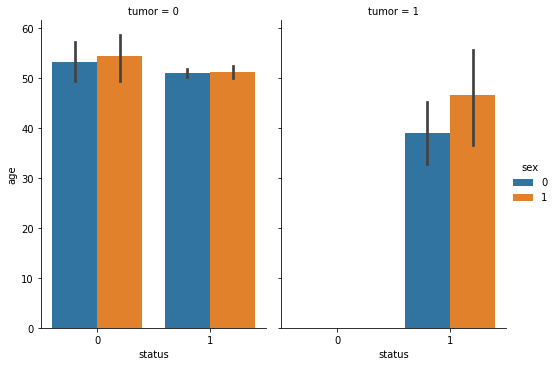

In [33]:
sns.catplot(x="status", y="age", hue="sex",
            col="tumor", aspect=.7,
            kind="bar", data=data)

#6. IMPLEMENTING THE SOLUTION

##Decision trees

###Random Forests

In [36]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values


test_features = data.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 75, random_state=42, min_samples_split = 20, max_depth=4)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_tree = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_tree.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.957883,0.956266
std,0.200964,0.182940
min,0.000000,0.031047
25%,1.000000,0.999744
50%,1.000000,0.999744
75%,1.000000,0.999744
max,1.000000,0.999744


In [37]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

forest.score(X_test,y_test)

#RMSE should be less than 10% of what we are predicting. 

Mean Absolute Error: 0.01326980209271067
Mean Squared Error: 0.004879223277835153
Root Mean Squared Error: 0.06985143719233809


0.8790559691444808

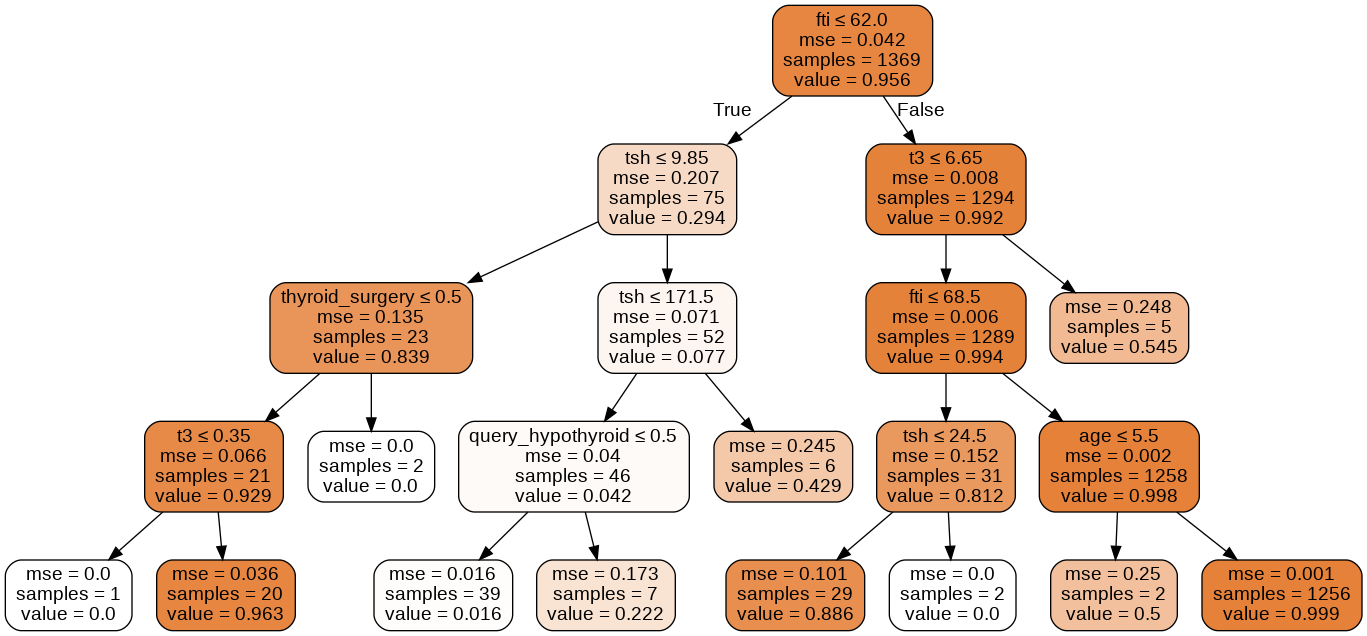

In [38]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[30]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

Random forest feature importance

In [39]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.03), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.22), ('t3_measured', 0.0), ('t3', 0.04), ('tt4_measured', 0.0), ('tt4', 0.0), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.69), ('tbg_measured', 0.0), ('tbg', 0.0)]

Variable: fti                  Importance: 0.69
Variable: tsh                  Importance: 0.22
Variable: t3                   Importance: 0.04
Variable: thyroid_surgery      Importance: 0.03
Variable: age                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable:

The hyperparameters tuned include:
- the number of trees - 300(which will be constant in the other models)
- max depth- 4
- minimum sample split- 20

With this parameters the RMSE was low and the accuracy was 0.87% therefore giving us a model which is performing well and will perform fairly good on unseen data. The most important features in random forest include:

- Variable: fti                  Importance: 0.69
- Variable: tsh                  Importance: 0.22
- Variable: t3                   Importance: 0.04
- Variable: thyroid_surgery      Importance: 0.03
- Variable: age                  Importance: 0.01

###Adaboost classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
rng = np.random.RandomState(1)
ada_boost= AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, learning_rate=0.25, random_state=rng)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))


ada_boost.score(X_test, y_test)

Mean Absolute Error: 0.00755939524838013
Mean Squared Error: 0.00755939524838013
Root Mean Squared Error: 0.08694478275537947


0.9924406047516199

Adaboost classifier feature importance

In [41]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.1), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.1), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.3), ('t3_measured', 0.0), ('t3', 0.09), ('tt4_measured', 0.0), ('tt4', 0.01), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.39), ('tbg_measured', 0.0), ('tbg', 0.0)]

Variable: fti                  Importance: 0.39
Variable: tsh                  Importance: 0.3
Variable: on_thyroxine         Importance: 0.1
Variable: on_antithyroid_medication Importance: 0.1
Variable: t3                   Importance: 0.09
Variable: age                  Importance: 0.01
Variable: tt4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: q

The hyperparameters tuned include:
- max depth - 5
- leanring rate - 0.25

With this parameters the RMSE was low and the accuracy was 0.99% therefore giving us a very perfect model which is overfit and will perform poorly on unseen data.
The most important features in adaboost classifier include:
- Variable: fti                  Importance: 0.43
- Variable: tsh                  Importance: 0.2
- Variable: on_thyroxine         Importance: 0.18
- Variable: on_antithyroid_medication Importance: 0.08
- Variable: tt4                  Importance: 0.03
- Variable: t4u                  Importance: 0.03
- Variable: query_hypothyroid    Importance: 0.02
- Variable: t3                   Importance: 0.02
- Variable: age                  Importance: 0.01

###Gradient boost classifier

In [42]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values


test_features = data.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300


gbc = GradientBoostingClassifier(n_estimators = target_number_of_trees, learning_rate=0.1, max_depth=4)
gbc = gbc.fit (X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbc))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbc)))

gbc.score(X_test, y_test)

Mean Absolute Error: 0.005399568034557235
Mean Squared Error: 0.005399568034557235
Root Mean Squared Error: 0.0734817530721555


0.9946004319654428

Gradoent boost classifier feature importance

In [43]:
# Get numerical feature importances
importances = list(gbc.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.02), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.22), ('t3_measured', 0.0), ('t3', 0.03), ('tt4_measured', 0.0), ('tt4', 0.02), ('t4u_measured', 0.0), ('t4u', 0.01), ('fti_measured', 0.0), ('fti', 0.64), ('tbg_measured', 0.0), ('tbg', 0.0)]

Variable: fti                  Importance: 0.64
Variable: tsh                  Importance: 0.22
Variable: t3                   Importance: 0.03
Variable: age                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: tt4                  Importance: 0.02
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: t4u                  Importance: 0.01

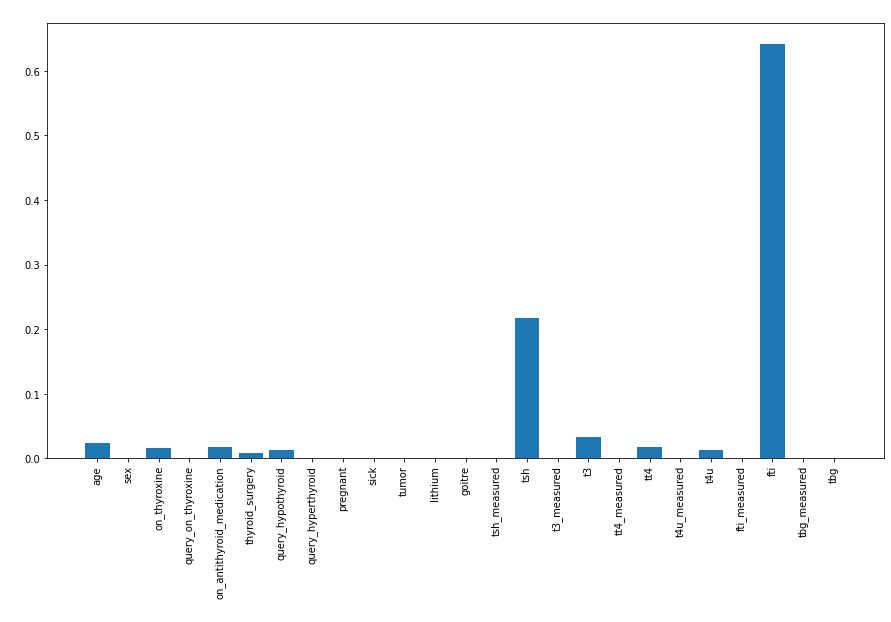

In [44]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance', fontsize= 12, color= 'white'); plt.xlabel('Features', fontsize = 12, color = 'white'); plt.title('Bar chart showing feature importance', color = 'white', fontsize = 14);
plt.show()




The hyperparameters tuned include:
- max depth - 4
- leanring rate - 0.1

With this parameters the RMSE was low and the accuracy was 0.99% therefore giving us a very perfect model which is overfit and will perform poorly on unseen data.
The most important features in adaboost classifier include:
- Variable: fti                  Importance: 0.64
- Variable: tsh                  Importance: 0.21
- Variable: age                  Importance: 0.03
- Variable: t3                   Importance: 0.03
- Variable: on_thyroxine         Importance: 0.02
- Variable: on_antithyroid_medication Importance: 0.02
- Variable: tt4                  Importance: 0.02
- Variable: thyroid_surgery      Importance: 0.01
- Variable: query_hypothyroid    Importance: 0.01
- Variable: t4u                  Importance: 0.01

**Summary**
The best models to use are random forest and gradient boost classifier. Although gradient boost classifier is computationally expesnsive and getting the best combination of hyperparameters is difficult it yeilds a lower RMSE and a good score. Adaboost gives us a good score as well but is prone to overfitting.

##SVM

In [34]:
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
#Loading the data with a new name
data1=data
data1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,-1
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,-1
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,-1
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,-1
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,-1


In [47]:
# from sklearn import preprocessing
# # Get column names first
# names = data1.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(data1)
# scaled_df = pd.DataFrame(scaled_df, columns=names)
# scaled_df.head()

In [48]:
# data1= data1.drop['status']
# status= data1.status

In [49]:
#Dealing with outliers

# print(f"Size of dataset with outliers: {df.shape}")
# # dealing with outliers
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print("...................")

# print(f"Size of dataset after removal of outliers: {df.shape}")

###Linear function

In [50]:
data1['status'].unique()

array([0, 1], dtype=int8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


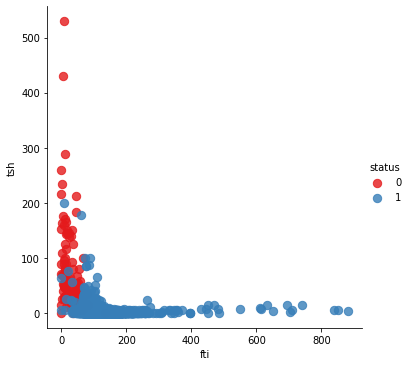

In [51]:
# We are going to use fti and tsh as our classifying criteria as they are the ones with the highest importnce in the decision trees models. 
# So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('fti', 'tsh', data=data1, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

From the graph we can have two classes, 1/negative indicated by blue dots and 0/hypothyroid representated by the red dots. We can also obeserve that patients with hypothyroid have a higher tsh and lower fti while those who are negative have lower tsh. We can the

We can also observe that indeed points that have a high concetration of flour are muffins and conversely, the ones that have a high concentration of butter are cupcakes. Hence we can use svm to train a model that will be able to classify a recipe as either a muffin recipe or a cupcake recipe.

Fitting the model

In [52]:
# Specify the input for the model

fti_tsh = data1[['fti', 'tsh']].values
# Put a label of either a muffin or not and assign it 0 or 1
status_label = data1[['status']].values
#np.where(data1['status']=='Muffin',0,1)

# Fit the model
model = SVC(kernel= 'linear')
model.fit(fti_tsh,status_label)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Results visulaization

In [53]:
print(data1['fti'].max())
print(data1['tsh'].min())

881.0
0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


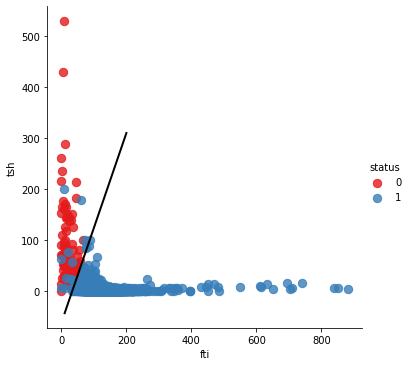

In [54]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(200, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('fti', 'tsh', data=data1, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


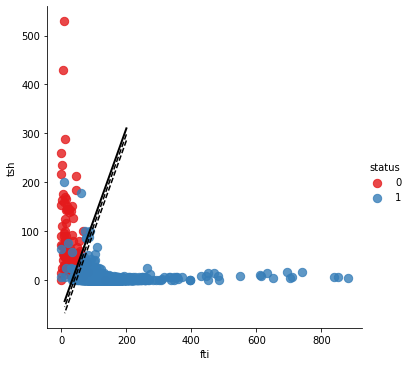

In [55]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectorsd
sns.lmplot('fti', 'tsh', data=data1, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');

Mehtod 2

Splitting the dataset

In [56]:
# Seperating the target from our data
X = data1.drop(['status'],axis=1) # We remove status column since its our target column. 
y = data1['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(618,)

Fitting the model

In [57]:
# Let's now build the svm model 
status_model = SVC(kernel = 'linear')
# Train the model using the training set
status_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = status_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Evaluating the model

In [58]:
# Now that we have trained our model, let's test how well it can predict whether a patient has hypothyroid or not.
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
print(model_accuracy)

# We've gotten a classification rate of 98.86%. This is a pretty good accuracy score 

# For further evaluation you can also check the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

0.9870550161812298


array([[ 19,   6],
       [  2, 591]])

###Polynomial function

Data exploration

In [36]:
data1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
# Removing the target column
X = data1.drop(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'tbg_measured', 'tbg'],axis=1) # We remove status column since its our target column. 
y = data1['status']

from sklearn.decomposition import PCA
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape

Splitting our dataset

In [39]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting the model

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

Visualzing

In [ ]:
import matplotlib.pyplot as plt
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Status Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Making predictions

In [63]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)

In [64]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

0.9838187702265372
[[ 17   8]
 [  2 591]]


###Radial basis function

In [65]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
# # Create a mesh grid for our graph
# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# # A function that creates the hyperplanes from our model
# def plot_contours(ax, clf, xx, yy, **params):
#     Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Flower Classification with rbf SVC')
# # Set-up grid for plotting.
# X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()

In [67]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

In [68]:
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

0.9854368932038835
[[ 18   7]
 [  2 591]]


SUMMARY
- Both polynomial and rbf have good accuracy scores with very low possibility of overfitting. They are both computationally expensive since we have a rather large dataset a well.


# FOLLOW UP QUESTIONS

a) Did we have the right data?
Yes we do have the right data.

b) Do we need more data to answer the question?
No

c) Did we have the right questions?Yes